# Anomaly Detection

This notebook will detail how four algorithms—Rolling Mean, ARIMA, Autoencoder, and Combination Random Cut Forest—can be used to detect anomalies in my five time series datasets. These are unsupervised approaches, so three different definitions for "anomaly" will be used: standard deviations from the data mean, standard deviations from the mean of errors, and nonparametric dynamic thresholding. In other words, this will perform the right half of the following diagram.

<img src="explore/Experiments_Diagram.jpg">




## First let's import everything

In [1]:
# Standard modules
import os
import sys
import datetime
import pandas as pd
from pandas import datetime
from pandas import read_csv
import numpy as np
from matplotlib import pyplot
import progressbar

# Custom modules
from detect_anomalies import *

## Detect anomalies

### Starting with standard deviations from the mean of the data

In [2]:
datasets = ['Data/BusVoltage.csv', 'Data/TotalBusCurrent.csv', 'Data/BatteryTemperature.csv', 'Data/WheelTemperature.csv', 'Data/WheelRPM.csv']
var_names = ['Voltage (V)', 'Current (A)', 'Temperature (C)', 'Temperature (C)', 'RPM']


Detected outliers: 96



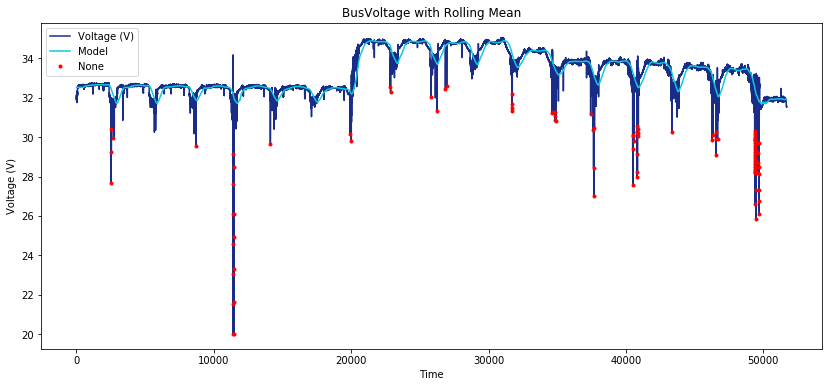


Detected outliers: 172



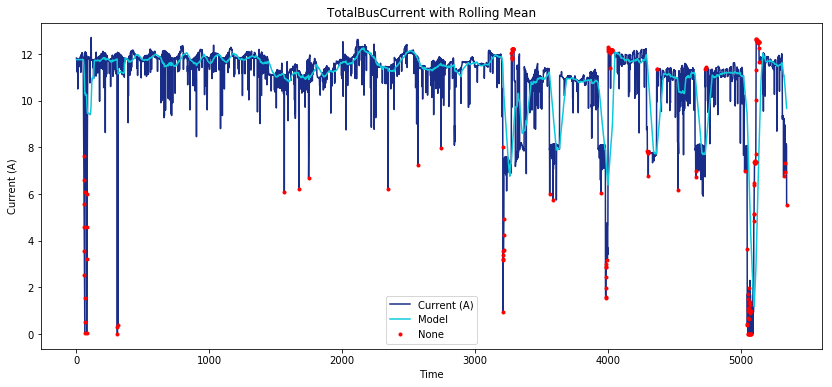


Detected outliers: 1712



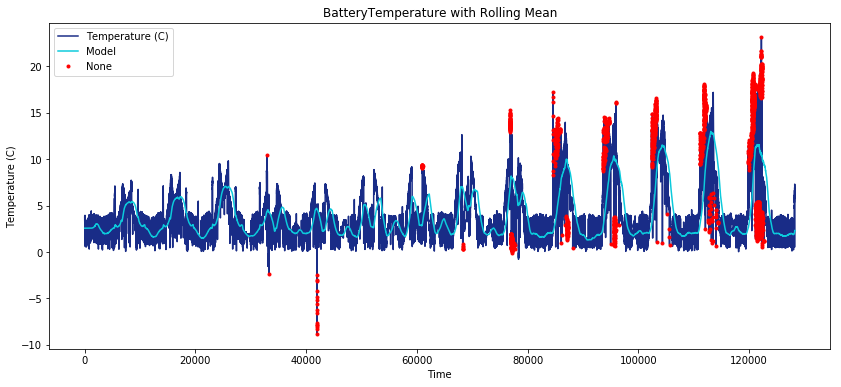


Detected outliers: 39720



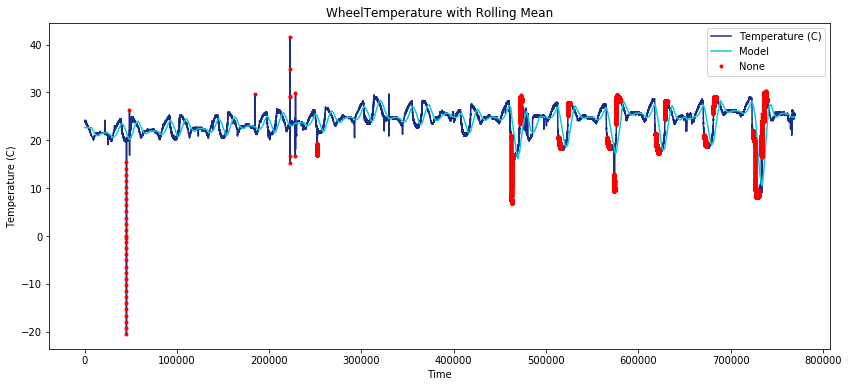


Detected outliers: 19627



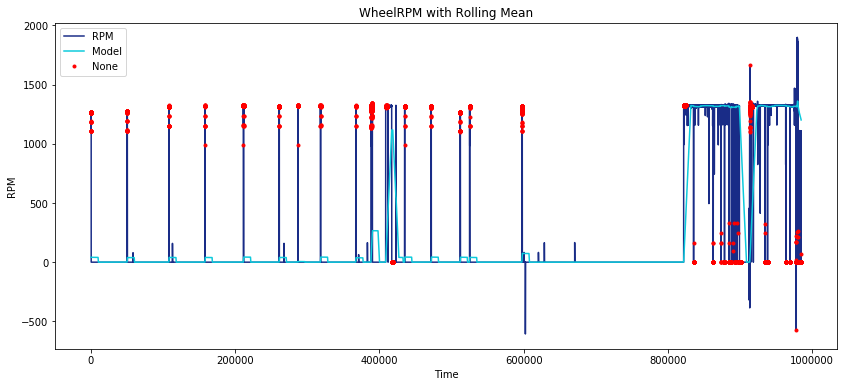

In [3]:
# Rolling Mean
for ds in range(len(datasets)):
    var_name = var_names[ds]
    ds_name = datasets[ds][5:-4] # drop 'Data/' and '.csv'
    
    file = 'save/datasets/' + ds_name + '/rolling mean/data/' + ds_name + '_with_rolling_mean.csv'
    ts_with_model = pd.read_csv(file)
    
    X = ts_with_model[var_name]
    Y = ts_with_model['Rolling Mean']
    
    ts_with_outliers = detect_anomalies(X, Y, var_name, ds_name, outlier_def='std', num_stds=2, verbose=False)

# ARIMA

# Autoencoder